In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import math

In [ ]:
# Image plot
def img_plot(im):
  plt.figure(figsize=(5,5))
  plt.imshow(im,cmap='gray')
  plt.show()

# Convolution
def D_Conv(Image,Filter):
  a , b =  Filter.shape
  x , y = Image.shape
  o_x = x - a + 1
  o_y = y - b + 1
  new_I = np.zeros((o_x,o_y))
  for i in range(o_x):
    for j in range(o_y):
      new_I[i][j] = np.sum(Image[i:i+a,j:j+b]*Filter)
  return new_I    
  
# Gaussian Blur 
def GussianBlur(shape=(3,3),m = 0, var = 0.1):
  kernal = np.zeros(shape)
  a = shape[0]//2
  b = shape[1]//2
  for i in range(-a,a+1):
    for j in range(-b,b+1):
      t = (i**2) + (j**2)
      t = t/(2*(var**2))
      t = math.exp(-t)
      u = 2*math.pi*(2*(var**2))
      u = u**0.5
      kernal[i,j] = (t/u)
  return kernal

# Motion Blur 
def MotionBlur(shape=(3,3),L=1,angle=45):
  kernal = np.zeros(shape)
  a = shape[0]//2
  b = shape[1]//2
  tan = round(math.tan(math.radians(angle)),2)
  tan = int(tan)
  for i in range(-a,a+1):
    for j in range(-b,b+1):
      if (i**2 + j**2 <=(L/2) and j!=0  and (i/j)==(-tan)):
        kernal[i,j] = 1/L  
  return kernal

# OutfocusBlur 
def OutBlur(shape=(3,3),R = 1,C=1):
  kernal = np.zeros(shape)
  a = shape[0]//2
  b = shape[1]//2
  for i in range(-a,a+1):
    for j in range(-b,b+1):
      if (i**2 + j**2 <=R**2):
        kernal[i,j] = 1/(math.pi*(R**2))  
  return kernal

# Gaussian Function
def Gus(x,var = 0.1):
  t = (x**2)
  t = t/(2*(var**2))
  t = math.exp(-t)
  u = 2*math.pi*(2*(var**2))
  u = u**0.5
  u = (t/u)
  return u

# Bilateral Filter
def getbil(x,y,var = 0.1):
  t = x**2 + y**2
  t = math.exp(-t/(2*var))
  t = t/((2*math.pi*var)**0.5)
  return t
  
def Bilateral(im,shape=(3,3),var=0.1,mul=0.1):
  a = shape[0]//2
  b = shape[1]//2
  x , y = im.shape
  new_im = np.ones(im.shape)+255

  for i in range(a,im.shape[0]-a):
    for j in range(b,im.shape[1]-b):
      win = im[i-1:i+2,j-1:j+2]
      t = im[i,j]
      new1 = 0
      new2 = 0
      for k in range(-a,a+1):
        for l in range(-b,b+1):
          new1 = new1 + mul*abs(win[k,l]-t)*win[k,l]
          new2 = new2 + mul*abs(win[k,l]-t)
      new1  = new1 / new2
      new_im[i,j] = new1
  return new_im


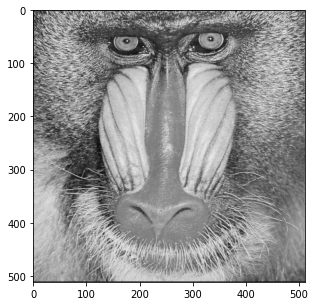

In [ ]:
path = '/content/drive/My Drive/Projects/DIP_Assignments/Test_Images/mandrill.tiff'
im = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
img_plot(im)


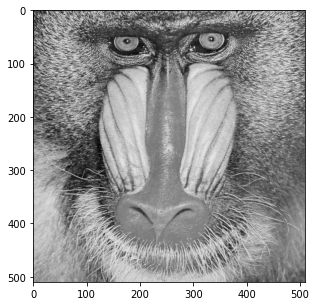

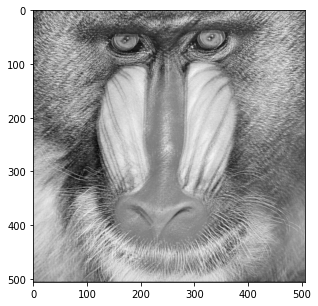

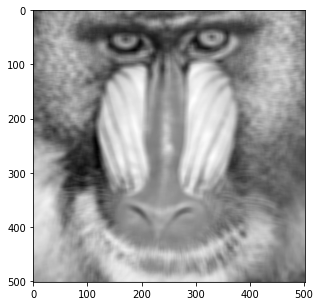

In [ ]:
# Gaussian Blur
Filter = GussianBlur(shape=(3,3),m = 0, var = 0.11)
#Filter = np.random.normal(0, 0.11,(5,5))
img_plot(D_Conv(im,Filter))

# Motion Blur
Filter = MotionBlur(shape=(7,7),L=10,angle = 47)
img_plot(D_Conv(im,Filter))

# Out Blur
Filter = OutBlur(shape=(11,11),R=100,C = 10)
img_plot(D_Conv(im,Filter))

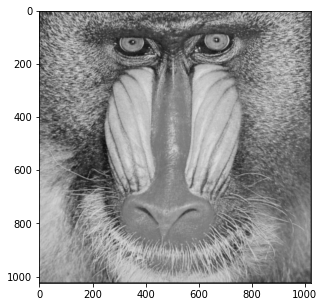

In [ ]:
# Linear Interpolation 
def Interpolation(im,x=2):

  if x ==2:
    k = np.array([0.5,1,0.5]).reshape(3,1)
    new_shape = (im.shape[0]*2,im.shape[1]*2)
    new_im = np.zeros(new_shape)
  
    for i in range(im.shape[0]):
      for j in range(im.shape[1]):
        new_im[2*i,2*j] = im[i,j]
  
    for i in range(0,new_im.shape[0],2):
      for j in range(1,new_im.shape[1]-1,2):
        t = new_im[i,j-1:j+2].reshape(3,1)
        new_im[i,j] = np.sum(np.multiply(t,k))

    for j in range(0,new_im.shape[1]):
      for i in range(1,new_im.shape[0]-1):
        t = new_im[i-1:i+2,j].reshape(3,1)
        new_im[i,j] = np.sum(np.multiply(t,k))

  elif x ==3:
    k = np.array([1/3,2/3,1,2/3,1/3]).reshape(5,1)
    new_shape = (im.shape[0]*3,im.shape[1]*3)
    new_im = np.zeros(new_shape)
  
    for i in range(im.shape[0]):
      for j in range(im.shape[1]):
        new_im[3*i,3*j] = im[i,j]
  
    for i in range(0,new_im.shape[0],3):
      for j in range(2,new_im.shape[1]-2,3):
        t = new_im[i,j-2:j+3].reshape(5,1)
        x = np.sum(np.multiply(t,k))
        new_im[i,j] = x
        new_im[i,j-1] = 2*x/3
        new_im[i,j+2] = x/3

    # for j in range(0,new_im.shape[1]):
    #   for i in range(2,new_im.shape[0]-2):
    #     t = new_im[i-2:i+3,j].reshape(5,1)
    #     x = np.sum(np.multiply(t,k))
    #     new_im[i,j] = x
    #     new_im[i-1,j] = 2*x/3
    #     new_im[i+2,j] = 2*x/3
        
  return new_im

img_plot(Interpolation(im,x=2))